<a href="https://colab.research.google.com/github/hwanin99/NLP_Study/blob/main/3_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D(Cluster%20Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
#nltk.download('popular')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def jaccard_similarity(d1,d2):
  lemmatizer=WordNetLemmatizer()
  
  words1=[lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2=[lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter=len(set(words1).intersection(set(words2)))
  union=len(set(words1).union(set(words2)))

  return inter/union

In [ ]:
d1='Think like a man of action and act like man of thought.'
d2='Try not to become a man of success but rather try to become a man of value.'
d3='Give me liberty, of give me death'

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


In [ ]:
tiv=TfidfVectorizer()
corpus=[d1,d2,d3]

tfidf=tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0],tfidf[1]))
print(cosine_similarity(tfidf[0],tfidf[2]))
print(cosine_similarity(tfidf[1],tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

## 한국어 형태소 분석기 설치

In [ ]:
!pip install konlpy

In [ ]:
!sudo apt-get install curl git

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
import urllib.request

raw=urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [ ]:
raw=[x.decode() for x in raw[1:10000]]

reviews=[]
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [ ]:
from konlpy.tag import Mecab

tagger=Mecab()
reviews=[tagger.morphs(x) for x in reviews]

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [ ]:
word2vec=Word2Vec(reviews,min_count=5)
word2vec

In [ ]:
word2vec.most_similar('영화')

<ipython-input-26-c3b4713d5706>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word2vec.most_similar('영화')


[('마음', 0.9530888795852661),
 ('작품', 0.9518659114837646),
 ('표현', 0.9510675668716431),
 ('듯', 0.9501262903213501),
 ('잔잔', 0.9475257396697998),
 ('빛', 0.9405984282493591),
 ('따뜻', 0.9391463398933411),
 ('이야기', 0.9380040168762207),
 ('행복', 0.9371881484985352),
 ('며', 0.9370923042297363)]

* t-sne을 이용한 단어 벡터 시각화

In [ ]:
tsne=TSNE(n_components=2)
tsne

TSNE()

In [ ]:
vocab=word2vec.wv.vocab
similarity=word2vec[vocab]
similarity

<ipython-input-28-65f3e8b0663f>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  similarity=word2vec[vocab]


array([[-0.07121193,  0.08030128, -0.17971706, ...,  0.16164958,
        -0.06893352, -0.01029791],
       [-0.37189114,  0.41055337, -0.2829553 , ..., -0.06326578,
        -0.07256383, -0.31104547],
       [-0.6685512 ,  0.36951965, -0.29494804, ...,  0.2039347 ,
        -0.13063401, -0.39134276],
       ...,
       [-0.01218421,  0.00907206, -0.01357021, ...,  0.01182332,
        -0.01505029,  0.0094235 ],
       [-0.01323707,  0.00453656, -0.00976061, ..., -0.00820364,
        -0.00891467,  0.00887043],
       [-0.01588474,  0.01026346, -0.00301367, ..., -0.00070234,
        -0.0140918 ,  0.00433142]], dtype=float32)

In [ ]:
import pandas as pd

transform_similarity=tsne.fit_transform(similarity)
df=pd.DataFrame(transform_similarity,index=vocab,columns=['x','y'])
df[0:10]

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,x,y
어릴,28.295990,-8.357121
때,51.076187,34.401684
보,53.763302,35.310375
고,54.834187,34.524097
지금,53.737076,32.965286
다시,54.376877,34.094414
봐도,55.836914,32.453102
재밌,61.529640,28.628321
어요,61.958828,27.494741
ㅋㅋ,64.159485,26.294779


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


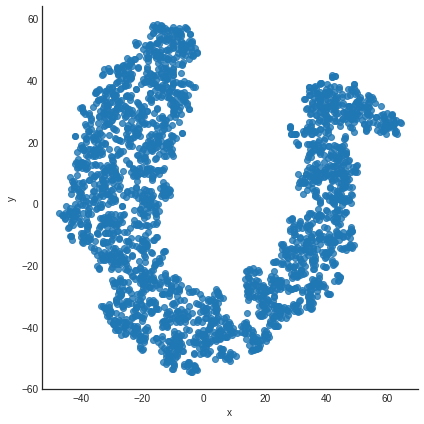

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x','y',data=df,fit_reg=False,size=6)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward=AgglomerativeClustering(n_clusters=6,linkage='ward')
predict=ward.fit_predict(df)
predict

array([0, 2, 2, ..., 1, 1, 1])

In [ ]:
results=df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,28.295990,-8.357121,0
때,51.076187,34.401684,2
보,53.763302,35.310375,2
고,54.834187,34.524097,2
지금,53.737076,32.965286,2
다시,54.376877,34.094414,2
봐도,55.836914,32.453102,2
재밌,61.529640,28.628321,2
어요,61.958828,27.494741,2
ㅋㅋ,64.159485,26.294779,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


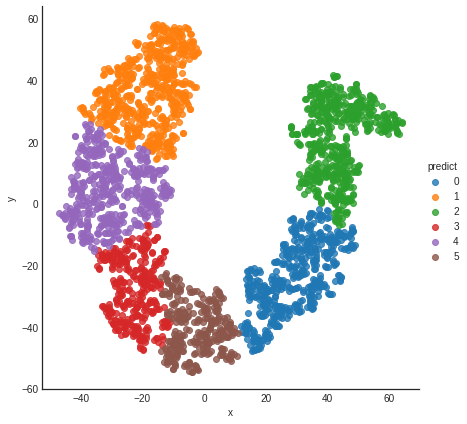

In [ ]:
sns.lmplot('x','y',data=results,fit_reg=False,size=6,hue='predict') #hue는 색깔구분
plt.show()

#### average

In [ ]:
avg=AgglomerativeClustering(n_clusters=6,linkage='average')
predict=avg.fit_predict(df)
predict

array([1, 3, 3, ..., 4, 4, 4])

In [ ]:
results=df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,28.295990,-8.357121,1
때,51.076187,34.401684,3
보,53.763302,35.310375,3
고,54.834187,34.524097,3
지금,53.737076,32.965286,3
다시,54.376877,34.094414,3
봐도,55.836914,32.453102,3
재밌,61.529640,28.628321,3
어요,61.958828,27.494741,3
ㅋㅋ,64.159485,26.294779,3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


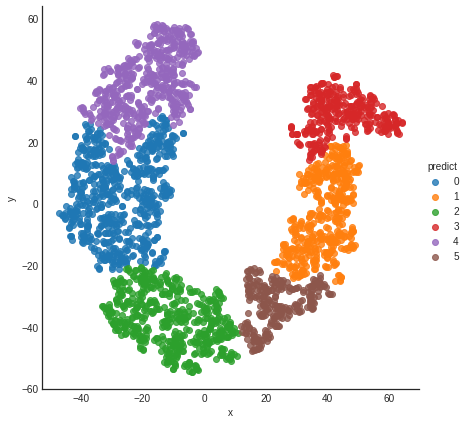

In [ ]:
sns.lmplot('x','y',data=results,fit_reg=False,size=6,hue='predict')
plt.show()

#### complete

In [ ]:
compl=AgglomerativeClustering(n_clusters=6,linkage='complete')
predict=compl.fit_predict(df)
predict

array([3, 4, 4, ..., 0, 0, 0])

In [ ]:
results=df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,28.295990,-8.357121,3
때,51.076187,34.401684,4
보,53.763302,35.310375,4
고,54.834187,34.524097,4
지금,53.737076,32.965286,4
다시,54.376877,34.094414,4
봐도,55.836914,32.453102,4
재밌,61.529640,28.628321,4
어요,61.958828,27.494741,4
ㅋㅋ,64.159485,26.294779,4


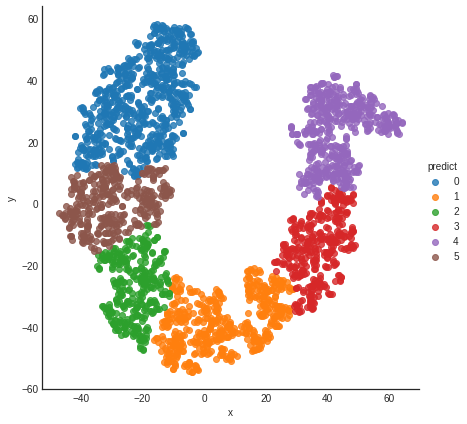

In [ ]:
sns.lmplot('x','y',data=results,fit_reg=False,size=6,hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [ ]:
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,dendrogram

distmatrix=pdist(df,metric='euclidean')
row_dist=pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,48.458773,50.561192,50.438822,48.536483,49.833176,49.244053,49.733272,49.188847,49.879298,...,59.268988,74.693162,46.912672,74.827540,69.852937,64.733875,62.881081,68.712810,75.895610,74.625515
1,48.458773,0.000000,2.836601,3.759993,3.023833,3.314961,5.144073,11.941792,12.889442,15.391380,...,83.525079,66.895820,79.453651,74.442230,81.960677,56.301492,64.889842,59.661700,65.102462,63.296879
2,50.561192,2.836601,0.000000,1.328543,2.345236,1.361997,3.530422,10.245285,11.324786,13.760872,...,86.361211,69.214740,82.245441,76.949103,84.701336,58.702839,67.518318,62.003177,67.318659,65.508402
3,50.438822,3.759993,1.328543,0.000000,1.906186,0.627503,2.300975,8.921283,10.008614,12.437157,...,87.145150,70.457618,82.816279,78.126064,85.714465,59.918269,68.626927,63.238355,68.586442,66.776902
4,48.536483,3.023833,2.345236,1.906186,0.000000,1.297796,2.161401,8.918146,9.875428,12.374259,...,85.644290,69.858183,81.122804,77.307046,84.534529,59.228703,67.642577,62.615205,68.094259,66.289541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,64.733875,56.301492,58.702839,59.918269,59.228703,59.572646,61.385006,67.887068,68.627875,71.084424,...,46.790270,11.096573,54.495390,18.852893,33.143492,0.000000,13.921742,4.060224,11.209970,9.905025
2635,62.881081,64.889842,67.518318,68.626927,67.642577,68.197393,69.774391,75.839835,76.419388,78.771448,...,33.585362,15.509806,43.192975,11.988519,19.474142,13.921742,0.000000,14.656432,19.151214,19.134502
2636,68.712810,59.661700,62.003177,63.238355,62.615205,62.912609,64.769221,71.339545,72.108955,74.578667,...,48.100992,7.298399,56.804481,16.718287,32.963310,4.060224,14.656432,0.000000,7.189654,6.027109
2637,75.895610,65.102462,67.318659,68.586442,68.094259,68.300361,70.235478,76.918742,77.743310,80.233025,...,52.181458,4.454299,62.204587,16.287158,35.056684,11.209970,19.151214,7.189654,0.000000,1.818907


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

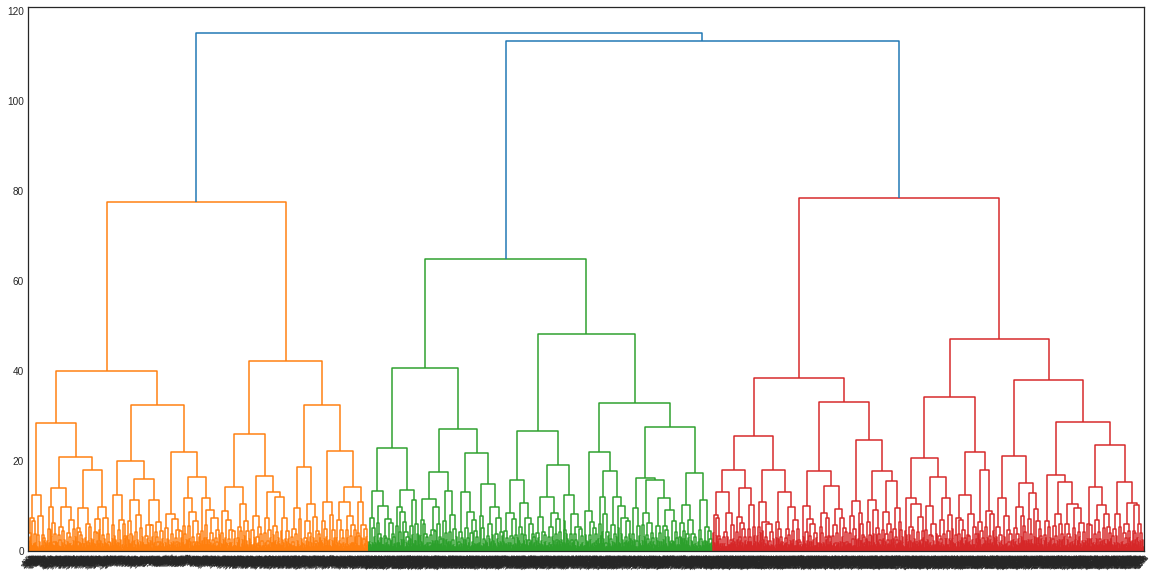

In [ ]:
row_clusters=linkage(distmatrix,method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

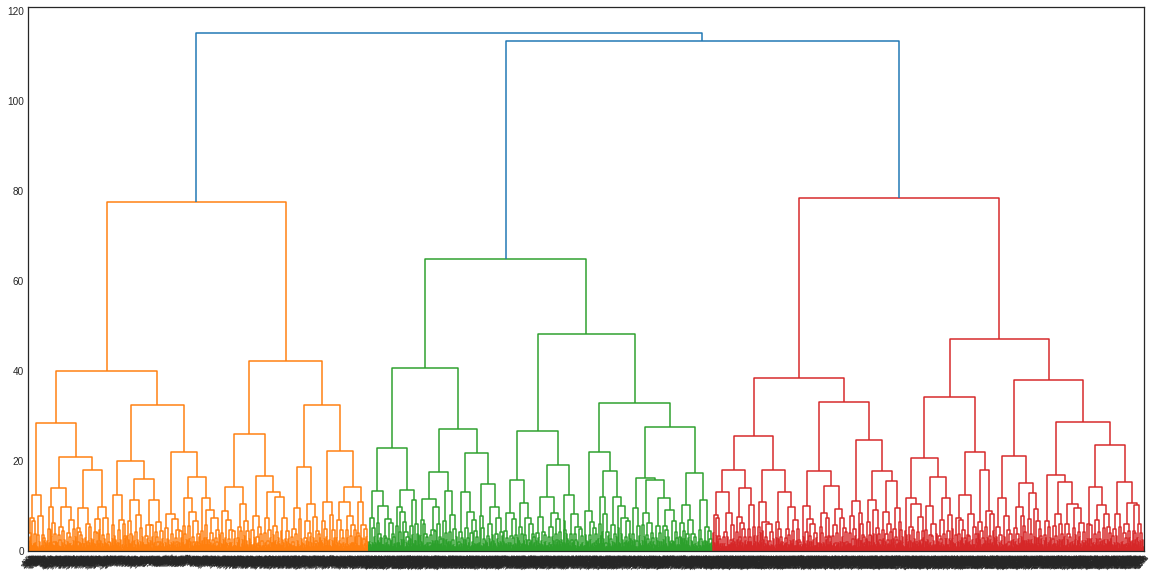

In [ ]:
mergins=linkage(df,method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergins,
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)
predict=kmeans.fit_predict(df)
predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
results=df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,28.295990,-8.357121,1
때,51.076187,34.401684,1
보,53.763302,35.310375,1
고,54.834187,34.524097,1
지금,53.737076,32.965286,1
다시,54.376877,34.094414,1
봐도,55.836914,32.453102,1
재밌,61.529640,28.628321,1
어요,61.958828,27.494741,1
ㅋㅋ,64.159485,26.294779,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


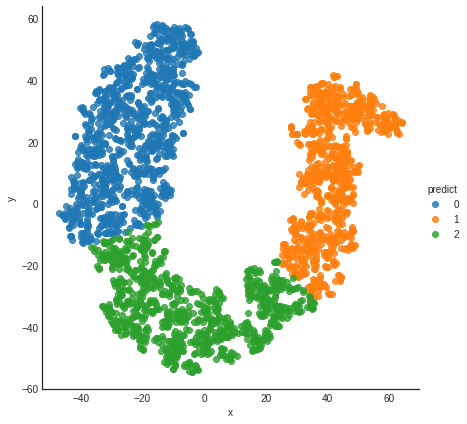

In [ ]:
sns.lmplot('x','y',data=results,fit_reg=False,size=6,hue='predict')
plt.show()

### 클러스터 개수 6

In [ ]:
kmeans=KMeans(n_clusters=6)
predict=kmeans.fit_predict(df)
predict

array([0, 4, 4, ..., 3, 3, 3], dtype=int32)

In [ ]:
results=df
results['predict']=predict
results[0:10]

,x,y,predict
어릴,28.295990,-8.357121,0
때,51.076187,34.401684,4
보,53.763302,35.310375,4
고,54.834187,34.524097,4
지금,53.737076,32.965286,4
다시,54.376877,34.094414,4
봐도,55.836914,32.453102,4
재밌,61.529640,28.628321,4
어요,61.958828,27.494741,4
ㅋㅋ,64.159485,26.294779,4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


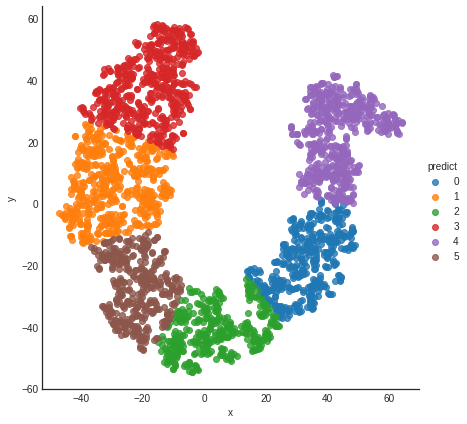

In [ ]:
sns.lmplot('x','y',data=results,fit_reg=False,size=6,hue='predict')
plt.show()